In [9]:
import pandas as pd
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import seaborn as sns
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import pygwalker as pyg
import folium 
from folium.plugins import MarkerCluster, HeatMap
import requests
from xml.etree import ElementTree
import numpy as np

In [10]:
user="vitaly.flerin"
password="4GyyERMq!!!"
query = '''select * from uat_ca.vf_rostov_research_06072023_hwe_all'''

In [11]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_14948\4148601419.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connect)


,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe
0,RO0096_3,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977),2023-03-01,RO0096_013,RO0031_011,RO0030_013,14997810.0
1,RO0108_013,62222329.0,RO0108_016,POINT (39.701917 47.133167),NaN,1,not_bad_coeff,39.701917,47.133167,POINT (39.701917 47.133167),2023-03-01,RO0298_012,RO0511_3,RO0298_2,62222329.0
2,RO3212_2,54562955.0,RO3212_2,POINT (39.407972 47.111222),NaN,1,not_bad_coeff,39.407972,47.111222,POINT (39.407972 47.111222),2023-03-01,RO0227_012,RO0212_012,RO0227_012,54562955.0
3,RO2056_2,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0
4,RO0364_2,66877481.0,RO0364_082,POINT (42.772682 47.017456),NaN,1,not_bad_coeff,42.772682,47.017456,POINT (42.772682 47.017456),2023-03-01,RO0364_2,RO0364_2,RO0364_2,66877481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123360,RO0668_3,47917763.0,RO0668_023,POINT (39.885833 47.813056),NaN,2,not_bad_coeff,39.885833,47.813056,POINT (39.885833 47.813056),2023-03-01,RO0668_3,RO0668_3,RO0668_3,47917763.0
123361,RO0600_2,6815678.0,RO0600_012,POINT (40.220764 47.706652),NaN,1,not_bad_coeff,40.220764,47.706652,POINT (40.220764 47.706652),2023-03-01,RO0601_2,RO0600_2,RO0601_2,6815678.0
123362,RO3801_2,5098310.0,RO3801_8,POINT (41.729333 49.634833),NaN,2,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0
123363,RO3801_2,5098310.0,RO3801_5,POINT (41.729333 49.634833),NaN,1,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0


ф-я на добавление флага для домашнего, раб и макс


In [12]:
df_hwe_copy = df.copy()
def flag_hwe(row):
    if row['hwe_sector'] == row['HOME_SECTOR']:
        return "1"
    else:
        return "0"

def flag_max(row):
    if row['hwe_sector'] == row['MAXDATA_SECTOR']:
        return "1"
    else:
        return "0"
    
def flag_work(row):
    if row['hwe_sector'] == row['WORK_SECTOR']:
        return "1"
    else:
        return "0"

df_hwe_copy['flag_hwe'] = df_hwe_copy.apply(flag_hwe,axis =1)
df_hwe_copy['flag_max'] = df_hwe_copy.apply(flag_max,axis =1)
df_hwe_copy['flag_work'] = df_hwe_copy.apply(flag_work,axis =1)


In [26]:
df_hwe_copy.head(4)

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,flag
0,RO0096_3,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977),2023-03-01,RO0096_013,RO0031_011,RO0030_013,14997810.0,0,0,0,0
1,RO0108_013,62222329.0,RO0108_016,POINT (39.701917 47.133167),NaN,1,not_bad_coeff,39.701917,47.133167,POINT (39.701917 47.133167),2023-03-01,RO0298_012,RO0511_3,RO0298_2,62222329.0,0,0,0,0
2,RO3212_2,54562955.0,RO3212_2,POINT (39.407972 47.111222),NaN,1,not_bad_coeff,39.407972,47.111222,POINT (39.407972 47.111222),2023-03-01,RO0227_012,RO0212_012,RO0227_012,54562955.0,0,0,0,0
3,RO2056_2,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0,0,0,0,0


In [27]:
df_hwe_copy.subs_id_hwe.nunique() # уникальных абонов

88937

In [28]:
print(df_hwe_copy[df_hwe_copy['flag_hwe'] == "1"].subs_id.nunique())  # уникальных абонов, у которых место жительства совпадает с плохим сектором из топ 3
print(df_hwe_copy[df_hwe_copy['flag_max'] == "1"].subs_id.nunique())
print(df_hwe_copy[df_hwe_copy['flag_work'] == "1"].subs_id.nunique())

44466
44687
44010


In [16]:
def flg(row):
    if row['flag_hwe'] =='1' and row['flag_max'] =='1' and row['flag_work'] == '1':
        return '1'
    else:
        return '0'


In [17]:
df_hwe_copy['flag'] = df_hwe_copy.apply(flg, axis = 1)
df_hwe_copy

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,flag
0,RO0096_3,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977),2023-03-01,RO0096_013,RO0031_011,RO0030_013,14997810.0,0,0,0,0
1,RO0108_013,62222329.0,RO0108_016,POINT (39.701917 47.133167),NaN,1,not_bad_coeff,39.701917,47.133167,POINT (39.701917 47.133167),2023-03-01,RO0298_012,RO0511_3,RO0298_2,62222329.0,0,0,0,0
2,RO3212_2,54562955.0,RO3212_2,POINT (39.407972 47.111222),NaN,1,not_bad_coeff,39.407972,47.111222,POINT (39.407972 47.111222),2023-03-01,RO0227_012,RO0212_012,RO0227_012,54562955.0,0,0,0,0
3,RO2056_2,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0,0,0,0,0
4,RO0364_2,66877481.0,RO0364_082,POINT (42.772682 47.017456),NaN,1,not_bad_coeff,42.772682,47.017456,POINT (42.772682 47.017456),2023-03-01,RO0364_2,RO0364_2,RO0364_2,66877481.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123360,RO0668_3,47917763.0,RO0668_023,POINT (39.885833 47.813056),NaN,2,not_bad_coeff,39.885833,47.813056,POINT (39.885833 47.813056),2023-03-01,RO0668_3,RO0668_3,RO0668_3,47917763.0,1,1,1,1
123361,RO0600_2,6815678.0,RO0600_012,POINT (40.220764 47.706652),NaN,1,not_bad_coeff,40.220764,47.706652,POINT (40.220764 47.706652),2023-03-01,RO0601_2,RO0600_2,RO0601_2,6815678.0,0,0,1,0
123362,RO3801_2,5098310.0,RO3801_8,POINT (41.729333 49.634833),NaN,2,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0
123363,RO3801_2,5098310.0,RO3801_5,POINT (41.729333 49.634833),NaN,1,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0


ДОЛЯ СОВПАДЕНИЯ ВСЕХ ФЛАГОВ НА ОДНОЙ БС

In [18]:
print(df_hwe_copy[df_hwe_copy['flag'] == "1"].subs_id.nunique()) 
print (df_hwe_copy[df_hwe_copy['flag'] == "1"].subs_id.nunique() / df_hwe_copy.subs_id_hwe.nunique() )

30009
0.3374186221707501


In [19]:
#df_hwe_copy.to_excel('qwe.xlsx')

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='LON', ylabel='LAT'>

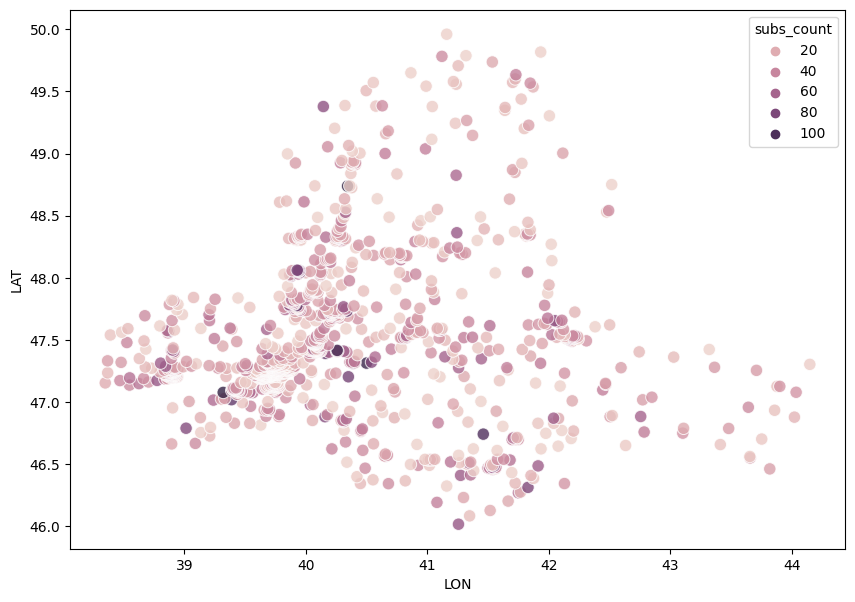

In [29]:
# Создаем датафрейм для распределения 
df_subs_count = df_hwe_copy.query('flag == "1"').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})

# Создаем scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_subs_count, x='LON', y='LAT', hue='subs_count', cmap='cool', s=80, alpha=0.8)

In [30]:
df_subs_count.sort_values(by='subs_count', ascending=False ) # распределение

,LAT,LON,ST_POINT,subs_count
1210,48.737806,40.343806,POINT (40.343806 48.737806),115
165,47.076833,39.320361,POINT (39.320361 47.076833),112
682,47.312889,40.499444,POINT (40.499444 47.312889),109
823,47.484861,40.061222,POINT (40.061222 47.484861),107
758,47.415222,40.258472,POINT (40.258472 47.415222),105
...,...,...,...,...
909,47.592081,39.136356,POINT (39.136356 47.592081),1
910,47.592705,40.694536,POINT (40.694536 47.592705),1
1235,49.020068,40.383130,POINT (40.38313 49.020068),1
70,46.658280,40.915000,POINT (40.915 46.65828),1


<Axes: >

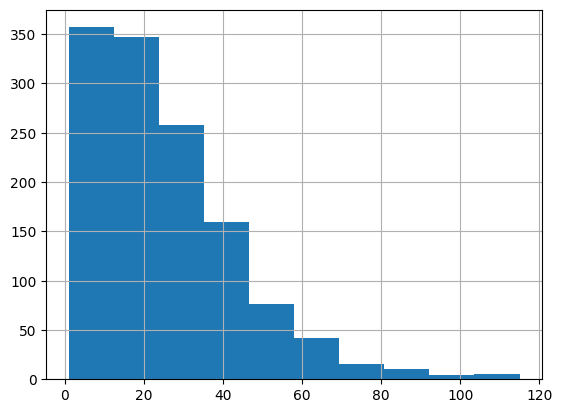

In [31]:
df_subs_count.subs_count.hist()

In [32]:
#находим выбросы
Q1 = df_subs_count["subs_count"].quantile(0.25)
Q3 = df_subs_count["subs_count"].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Нахождение выбросов
outliers = df_subs_count[(df_subs_count['subs_count'] < lower_bound) | (df_subs_count['subs_count'] > upper_bound)]
outliers.subs_count.sort_values(ascending=True).head(5)

1251    72
967     72
1016    73
329     73
35      74
Name: subs_count, dtype: int64

In [ ]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.query('flag == "1"').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 72:
        color = 'red'
    elif row['subs_count'] > 45 and row['subs_count'] < 72:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/9,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=str(row['subs_count'])
    ).add_to(m)
m#.save("HWE.html")

In [ ]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.query('flag_hwe == "1"').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 72:
        color = 'red'
    elif row['subs_count'] > 45 and row['subs_count'] < 72:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/9,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=str(row['subs_count'])
    ).add_to(m)
m#.save("HWE.html")

In [37]:
df_hwe_copy

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,flag
0,RO0096_3,14997810.0,RO0096_013,POINT (39.632891 47.207977),NaN,1,not_bad_coeff,39.632891,47.207977,POINT (39.632891 47.207977),2023-03-01,RO0096_013,RO0031_011,RO0030_013,14997810.0,0,0,0,0
1,RO0108_013,62222329.0,RO0108_016,POINT (39.701917 47.133167),NaN,1,not_bad_coeff,39.701917,47.133167,POINT (39.701917 47.133167),2023-03-01,RO0298_012,RO0511_3,RO0298_2,62222329.0,0,0,0,0
2,RO3212_2,54562955.0,RO3212_2,POINT (39.407972 47.111222),NaN,1,not_bad_coeff,39.407972,47.111222,POINT (39.407972 47.111222),2023-03-01,RO0227_012,RO0212_012,RO0227_012,54562955.0,0,0,0,0
3,RO2056_2,33686957.0,RO2056_012,POINT (40.090544 47.405919),NaN,1,not_bad_coeff,40.090544,47.405919,POINT (40.090544 47.405919),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0,0,0,0,0
4,RO0364_2,66877481.0,RO0364_082,POINT (42.772682 47.017456),NaN,1,not_bad_coeff,42.772682,47.017456,POINT (42.772682 47.017456),2023-03-01,RO0364_2,RO0364_2,RO0364_2,66877481.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123360,RO0668_3,47917763.0,RO0668_023,POINT (39.885833 47.813056),NaN,2,not_bad_coeff,39.885833,47.813056,POINT (39.885833 47.813056),2023-03-01,RO0668_3,RO0668_3,RO0668_3,47917763.0,1,1,1,1
123361,RO0600_2,6815678.0,RO0600_012,POINT (40.220764 47.706652),NaN,1,not_bad_coeff,40.220764,47.706652,POINT (40.220764 47.706652),2023-03-01,RO0601_2,RO0600_2,RO0601_2,6815678.0,0,0,1,0
123362,RO3801_2,5098310.0,RO3801_8,POINT (41.729333 49.634833),NaN,2,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0
123363,RO3801_2,5098310.0,RO3801_5,POINT (41.729333 49.634833),NaN,1,not_bad_coeff,41.729333,49.634833,POINT (41.729333 49.634833),2023-03-01,RO0801_2,RO0801_2,RO0801_2,5098310.0,0,0,0,0


In [ ]:
# создаем список координат из df 
#Это строка кода создает список координат в формате, удобном для работы с модулем folium. 
# Она берет значения столбцов 'LAT' и 'LON' из датафрейма df и формирует список кортежей, содержащих значения этих столбцов. 
# Вот как это работает:df[['LAT', 'LON']] - выбираются столбцы 'LAT' и 'LON' из датафрейма df.values - преобразует эти столбцы в массив numpy.tolist() - преобразует массив numpy в список кортежей
locationlist = df[['LAT', 'LON']].values.tolist()

#итоговый вывод результата
#location - это определяет начальное местоположение карты. Здесь мы устанавливаем координаты [55.62252, 37.30162], что примерно соответствует городу Москва.
#tiles - это определяет тему карты. Мы выбрали тему 'CartoDB dark_matter', которая показывает карту в темной гамме.
#zoom_start - это задает начальный масштаб карты.
#Далее мы создаем объект marker_cluster - кластер маркеров для группировки сгенерированных маркеров на карте.
map3 = folium.Map(location=[47.222078, 39.720358], tiles='CartoDB dark_matter', zoom_start=8)
marker_cluster = MarkerCluster().add_to(map3)
# создаем маркеры на карте 
#Этот блок кода генерирует маркеры для каждой точки в списке координат locationlist и добавляет их в marker_cluster.
#Цикл for перебирает элементы locationlist - набор кортежей с координатами LAT и LON. 
# Для каждой точки мы создаем текстовое содержимое маркера (поле 'subs_id' из датафрейма df). 
# Затем мы добавляем маркер на карту используя folium.Marker. 
# В качестве аргументов этой функции мы передаем locationlist, координаты каждой точки, текстовое содержимое маркера (popup_text) и опции иконки маркера (icon).
# Мы добавляем каждый маркер в кластер marker_cluster с помощью метода .add_to().
#for point in range(0, min(len(locationlist), 1000)):
for point in range(len(locationlist)):
     # задаем текстовое содержимое маркера
    popup_text = f"ID:{df['subs_id'][point]}"
       # создаем маркер и добавляем его на карту
    folium.Marker(locationlist[point], popup=popup_text, icon=folium.Icon(icon='male', angle=0, prefix='fa')).add_to(marker_cluster)  
# выводим карту
map3#.save("map.html")

Для нахождения выбросов в столбце subs_id с помощью машинного обучения можно использовать алгоритмы аномалийного обнаружения, такие как One-Class SVM или Isolation Forest.

Пример кода для поиска выбросов с помощью One-Class SVM:

In [ ]:
#Пример кода для поиска выбросов с помощью Isolation Forest:
import pandas as pd
from sklearn.ensemble import IsolationForest
# Инициализация алгоритма Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
# Инициализация алгоритма One-Class SVM
clf = OneClassSVM(kernel='rbf', nu=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)